# Bayesian estimation


## Essential Background

### Mean and Expected Value
Mean and Expected Value are closely related terms. However, there is a difference.

For example, given the price of four different items, $x_1 = 10, x_2 = 20, x_3 = 30, x_4 = 40$, the mean is the average of the four items.

$$\mu = \frac{1}{n}\sum_{i=1}^{n}x_i = \frac{1}{4}(10 + 20 + 30 + 40) = 25$$

The above outcome cannot be defined as the expected value because the system states (values) not hidden, and we have used the entire population (all 4 items) to calculate the mean.

Now assume four different body temperatures of a patient, $x_1 = 36.8, x_2 = 36.7, x_3 = 36.9, x_4 = 37.0$. The patient's is a system, and the body temperature is a system state. 
The measurements are different due to the random noise in the measurement process. We do not know the exact body temperature of the patient since it is Hidden State. However, we can estimate the body temperature using the measurements. The expected value of the body temperature is the average of the four measurements.

$$\mathbb{E}[x] = \frac{1}{n}\sum_{i=1}^{n}x_i = \frac{1}{4}(36.8 + 36.7 + 36.9 + 37.0) = 36.85$$

The outcome is the expected value of the body temperature. The expected value is the value we expect to get if we repeat the experiment many times. The mean is usually denoted by $\mu$ and the expected value by $\mathbb{E}[x]$.

### Variance and Standard Deviation
Variance and Standard Deviation are closely related terms. However, there is a difference. The variance is the average of the squared differences from the mean. The standard deviation is the square root of the variance. The variance is usually denoted by $\sigma^2$ and the standard deviation by $\sigma$.

Suppose we want to compare the prices of two shops. The following table shows the prices of four different items in the two shops.

| Shop | Item 1 | Item 2 | Item 3 | Item 4 |
| --- | --- | --- | --- | --- |
| Shop 1 | 10 | 20 | 30 | 40 |
| Shop 2 | 8 | 22 | 28 | 42 |

As we can see, the mean of the prices of the two shops is the same. Let's calculate the variance and standard deviation of the prices of the two shops.

Since the variance measures the spreading of the data set, we would like to know the data set deviation from its mean. We can calculate the distance from the mean for each variable by subtracting the mean from each variable.

The price is denoted by $x$ and the mean by $\mu$. The distance from the mean is denoted by $x - \mu$. The following table shows the distance from the mean for each variable.

| Shop | Item 1 | Item 2 | Item 3 | Item 4 |
| --- | --- | --- | --- | --- |
| Shop 1 | 10 - 25 = -15 | 20 - 25 = -5 | 30 - 25 = 5 | 40 - 25 = 15 |
| Shop 2 | 8 - 25 = -17 | 22 - 25 = -3 | 28 - 25 = 3 | 42 - 25 = 17 |

The following table shows the squared differences from the mean for each variable.

| Shop | Item 1 | Item 2 | Item 3 | Item 4 |
| --- | --- | --- | --- | --- |
| Shop 1 | (-15)^2 = 225 | (-5)^2 = 25 | 5^2 = 25 | 15^2 = 225 |
| Shop 2 | (-17)^2 = 289 | (-3)^2 = 9 | 3^2 = 9 | 17^2 = 289 |

The variance is the average of the squared differences from the mean. The following table shows the variance of the prices of the two shops.

$$\sigma^2 = \frac{1}{n}\sum_{i=1}^{n}(x_i - \mu)^2$$

For Shop 1:

$$\sigma^2 = \frac{1}{4}(225 + 25 + 25 + 225) = 125$$

For Shop 2:

$$\sigma^2 = \frac{1}{4}(289 + 9 + 9 + 289) = 149$$

We can see that although the mean of both teams is the same, the variance of the prices of Shop 2 is higher than the variance of the prices of Shop 1. Therefore, the prices of Shop 2 are more spread out than the prices of Shop 1. 

The units of the variance are squared units of the original data set. For example, if the original data set is in meters, the variance is in meters squared. Therefore, it is difficult to interpret the variance. The standard deviation is the square root of the variance. The standard deviation is usually denoted by $\sigma$.

$$\sigma = \sqrt{\sigma^2}$$

The standard deviation of Shop would be $\sigma = \sqrt{125} = 11.18$ and the standard deviation of Shop 2 would be $\sigma = \sqrt{149} = 12.21$.

Now, assume that we would likme to calculate the meean and variance of the items in all shops in the country. That would be a lot of work - we need to collect the data from all shops in the country. 

On the other hand, we can estimate the items mean and variance picking a big data set and making the calculations on this data set.

The data set of 100 randomly selected items should be a good estimation of the mean and variance of all items in the country.

However, when we estimate the variance, the denominator should be $n - 1$ instead of $n$.

$$\sigma^2 = \frac{1}{n - 1}\sum_{i=1}^{n}(x_i - \mu)^2$$

The factor $n - 1$ is called Bessel's correction. The reason for the correction is that the mean is estimated from the data set. Therefore, the data set is not independent of the mean. The correction is used to make the variance unbiased.

### Normal Distribution
It seems that the normal distribution is the most common distribution in nature. The normal distribution is also called the Gaussian distribution. The normal distribution is a continuous probability distribution. The normal distribution is defined by two parameters: the mean $\mu$ and the variance $\sigma^2$. The normal distribution is usually denoted by $\mathcal{N}(\mu, \sigma^2)$.

$$\mathcal{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$$

The Gaussian curve is also called the Probability Density Function (PDF) for the normal distribution. The PDF is a function that describes the relative likelihood for this random variable to take on a given value. The PDF is a non-negative function, and the area under the PDF is equal to one.

The following figure shows the PDFs of electric car delivery time for three different cities.

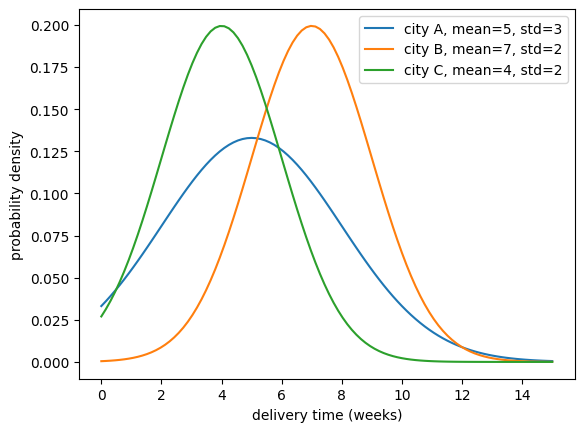

In [6]:
#The following figure shows the PDFs of tesla delivery time for three different cities.
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

city1 = stats.norm(5, 3)
city2 = stats.norm(7, 2)
city3 = stats.norm(4, 2)

x = np.linspace(0, 15, 100)
plt.plot(x, city1.pdf(x), label='city A, mean=5, std=3')
plt.plot(x, city2.pdf(x), label='city B, mean=7, std=2')
plt.plot(x, city3.pdf(x), label='city C, mean=4, std=2')
plt.xlabel('delivery time (weeks)')
plt.ylabel('probability density')
plt.legend()
plt.show()


- In city A, the mean delivery time is 5 weeks and the standard deviation is 3 week. 
- In city B, the mean delivery time is 7 weeks and the standard deviation is 2 weeks.
- In city C, the mean delivery time is 4 weeks and the standard deviation is 2 weeks.

We can see that the Gaussian shapes of the city B and city C dilivery times are similar. However, thier centers are different. That means that the delivery time in city B is longer than the delivery time in city C. 

The Gaussian shape of city A is wider than the Gaussian shapes of city B and city C. That means that the delivery time in city A is more spread out than the delivery time in city B and city C.

Usually, measurements are not accurate. Therefore, the measurements are not equal to the system state. The measurements are noisy. The noise is usually modeled as a Gaussian distribution with zero mean and variance $\sigma^2$.

### Random Variable
A random variable describes the hidden state of the system. A random variable is a set of possible values from a random experiment. 

The random variable can be continuous or discrete:

- A continuous random variable can take any value within a specific range, such as battery charge time or marathon race time.
- A discrete random variable is countable, such as the number of website visitors or the number of students in the class.
The random variable is described by the probability density function. The probability density function is characterized by moments.

The moments of the random value are expected values of powers of the random variable. We are interested in two types of moments:

- The $k^{th}$ moment of the random variable $x$ is defined as $\mathbb{E}[x^k]$.
- The $k^{th}$ central moment of the random variable $x$ is defined as $\mathbb{E}[(x - \mu)^k]$.

thourghout this notebook, random varibales are characterized by the following:
- The first raw moment is the mean $\mu = \mathbb{E}[x]$.
- The second central moment is the variance $\sigma^2 = \mathbb{E}[(x - \mu)^2]$.

### Estimate, Accuracy, and Precision

An Estimate is about evaluating the hidden state of the system. The true position of the aircraft is hidden from the observer. We can estimate the aircraft position using sensors, such as radar. The estimate can be significantly improved by using multiple sensors and applying advanced estimation and tracking algorithms (such as the Kalman Filter). Every measured or computed parameter is an estimate.

Accuracy indicates how close the measurement is to the true value.

Precision describes the variability in a series of measurements of the same parameter. Accuracy and precision form the basis of the estimate.

The following figure illustrates accuracy and precision.

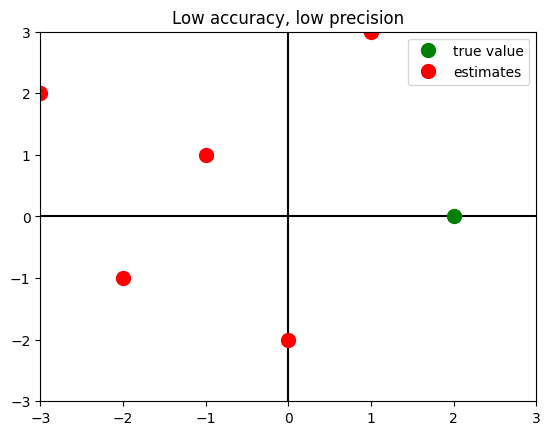

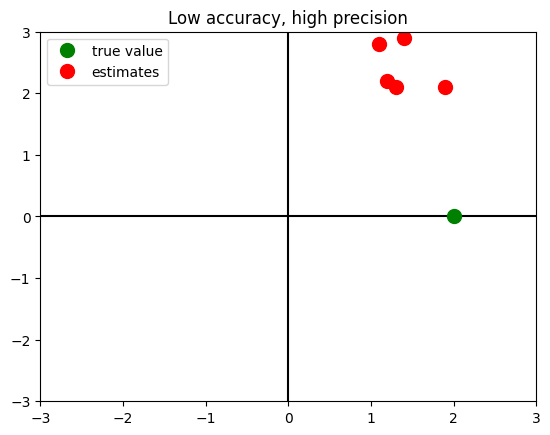

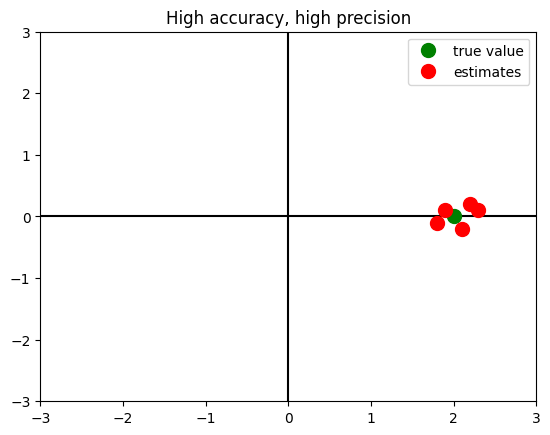

In [27]:
# Illustrate low accuracy, low precision - low accuracy, high precision - high accuracy, low precision - high accuracy, high precision
# using red dots for estimates and green dots for true value

# Low accuracy, low precision
# draw cartesian axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
# plot the true value
plt.plot(2, 0, 'go', ms=10, label="true value")
# plot 5 estimates far from the true value
plt.plot([-3, -2, -1, 0, 1], [2, -1, 1, -2, 3], 'ro', ms=10, label="estimates")
plt.title("Low accuracy, low precision")
plt.legend()
# axis limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()
# Low accuracy, high precision
# draw cartesian axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
# plot the true value
plt.plot(2, 0, 'go', ms=10, label="true value")
# plot 5 estimates far from the true value
plt.plot([1.9, 1.1, 1.2, 1.3, 1.4], [2.1, 2.8, 2.2, 2.1, 2.9], 'ro', ms=10, label="estimates")
plt.title("Low accuracy, high precision")
plt.legend()
# axis limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()


# High accuracy, high precision
# draw cartesian axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
# plot the true value
plt.plot(2, 0, 'go', ms=10, label="true value")
# plot 5 estimates around the true value
plt.plot([1.9, 1.8, 2.1, 2.2, 2.3], [0.1, -0.1, -0.2, 0.2, 0.1], 'ro', ms=10, label="estimates")
plt.title("High accuracy, high precision")
plt.legend()
# axis limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()





High-precision systems have low variance in their measurements (i.e., low uncertainty), while low-precision systems have high variance in their measurements (i.e., high uncertainty). The random measurement error produces the variance.

Low-accuracy systems are called biased systems since their measurements have a built-in systematic error (bias).

The influence of the variance can be significantly reduced by averaging or smoothing measurements. For example, if we measure temperature using a thermometer with a random measurement error, we can make multiple measurements and average them. Since the error is random, some measurements would be above the true value and others below the true value. The estimate would be close to the true value. The more measurements we make, the closer the estimate will be.

On the other hand, a biased thermometer produces a constant systematic error in the estimate.

All examples in this notebook assume unbiased systems.

### Summary
A measurement is a random variable, described by a probability density function. The probability density function is characterized by moments. The first raw moment is the mean $\mu = \mathbb{E}[x]$. The second central moment is the variance $\sigma^2 = \mathbb{E}[(x - \mu)^2]$.

The mean of the measurement is the expected value of the random variable. 

The offset between the mean of the measurements and the true value is the accuracy of the measurements, also known as bias or systematic measurement error.

The dispersion of the distribution is the measurement precision, also known as the measurement noise, random measurement error, or measurement uncertainty.

## Probability

### Introduction
Let $\omega$ be the sample space of all possible outcomes of an experiment or some other data-gathering process.

Example when flipping two cons, the sample space is $\omega = \{HH, HT, TH, TT\}$.

Measurable subsets of $\omega$ are called events. An event is a subset of the sample space. For example, the event "at least one head" is the subset $\{HH, HT, TH\}$. $F$ is the set of all events.

A function $P$ that assigns a real number $P(A)$ to each event $A$ is called a probability measure if it satisfies the following axioms:
- $P(\phi) = 0$.
- $P(A) \geq 0$ for all $A \in F$.
- $P(\omega) = 1$.
- If $A_1, A_2, \dots$ are disjoint events, then $P(\bigcup_{i=1}^{\infty}A_i) = \sum_{i=1}^{\infty}P(A_i)$.

A random varibale is a measurable function $X: \omega \rightarrow \mathbb{R}$.
Thus for the two coin example, $X(HH) = 2, X(HT) = X(TH) = 1, X(TT) = 0$.
So X is simply the number of heads.

Our data are modelled by a vector of random variables $X = (X_1, X_2, \dots, X_n)$.

The distribution function of a random variable $X$ is the probability measure $F_X(x) = P(X \leq x)$, where $x$ is a real number. So $F_X(x)$ is
- non-decreasing
- $0 \leq F_X(x) \leq 1$
- $\lim_{x \rightarrow -\infty}F_X(x) = 0$
- $\lim_{x \rightarrow \infty}F_X(x) = 1$

A discrete random variable takes values only in some countable set $\{x_1, x_2, \dots\}$, and has  probability mass function $p_X(x) = P(X = x)$.
- $f_X(x) is zero unless x is one of the possible values of X$
- $f_X(x) \geq 0$ for all $x$
- $\sum_{x}f_X(x) = 1$
- $P(X \in A) = \sum_{x \in A}f_X(x)$ for any event $A$.

A continuous random variable takes values in some interval $[a, b]$, and has probability density function $f_X(x)$.
- $f_X(x) = \int_{x}^{-\infty}f_X(t)dt$
- $\int_{-\infty}^{\infty}f_X(x)dx = 1$
- $P(X \in A) = \int_{A}f_X(x)dx$ for any event $A$.


[Notation note: There will be inconsistent use of a subscript in mass, density and distributions functions to denote the random varibale Also f will sometimes be p.]

### Expectation and Variance
The expectation of a random variable $X$ is $$E[X] = \int_{-\infty}^{\infty}xf_X(x)dx, \text{exists when the integral is finite}$$ for a continuous random variable, and $$E[X] = \sum_{x}xf_X(x), \text{exists when the sum is finite}$$ for a discrete random variable.  
$ E(X) $ is called the expected value or the mean of $X$ as we have seen before.  
If g : $\mathbb{R} \rightarrow \mathbb{R}$ is a function, then the expectation of $g(X)$ is $$E[g(X)] = \int_{-\infty}^{\infty}g(x)f_X(x)dx$$ for a continuous random variable, and $$E[g(X)] = \sum_{x}g(x)f_X(x)$$ for a discrete random variable.

The variance of a random variable $X$ is $$Var(X) = E[(X - E[X])^2] = E[X^2] - E[X]^2$$

### Independence
Two random variables $X$ and $Y$ are independent if $$P(X \in A, Y \in B) = P(X \in A)P(Y \in B)$$ for all events $A$ and $B$. And so for random variables $X_1, X_2, \dots, X_n$ are independent if $$P(X_1 \in A_1, X_2 \in A_2, \dots, X_n \in A_n) = P(X_1 \in A_1)P(X_2 \in A_2) \dots P(X_n \in A_n)$$ for all events $A_1, A_2, \dots, A_n$.

If the independent random variables $X$ and $Y$ have distributions $f_X(x)$ and $f_Y(y)$, then the distribution of $(X, Y)$ is $$f_{X, Y}(x, y) = f_X(x)f_Y(y)$$ And therefor the distribution of $(X_1, X_2, \dots, X_n)$ is $$f_X(x) = \prod_{i=1}^{n}f_{X_i}(x_i)$$

Random varibales that are independent and that have same distribution are called independent and identically distributed (i.i.d.) random variables.

### Maxima of i.i.d. Random Variables

Let $X_1, X_2, \dots, X_n$ be i.i.d. random variables and $Y = \max(X_1, X_2, \dots, X_n)$. Then the distribution of $Y$ is $$F_Y(y) = P(Y \leq y) = P(X_1 \leq y, X_2 \leq y, \dots, X_n \leq y) = \prod_{i=1}^{n}P(X_i \leq y) = \prod_{i=1}^{n}F_{X_i}(y)$$ 

The density of $Y$ can then be obtained by differentiation (if continuous), or differentiating (if discrete).  
Can do similar analysis for minima.

### Sums of linear transformations of random variables

For any random variables $X$ and $Y$ and constants $a$ and $b$, $$E[aX + bY] = aE[X] + bE[Y]$$ And so for random variables $X_1, X_2, \dots, X_n$ and constants $a_1, a_2, \dots, a_n$, 
$$E[X_1 + X_2 + \dots + X_n] = E[X_1] + E[X_2] + \dots + E[X_n]$$
$$E[a_1X_1 + a_2X_2 + \dots + a_nX_n] = a_1E[X_1] + a_2E[X_2] + \dots + a_nE[X_n]$$
$$E(a_1X_1 + b_1) = a_1E[X_1] + b_1$$
$$var(a_1X_1 + b_1) = a_1^2var(X_1)$$

For independent random variables $X_1, X_2, \dots, X_n$, 
$$E(X_1 \times X_2 \times \dots \times X_n) = E(X_1) \times E(X_2) \times \dots \times E(X_n)$$
$$var(X_1 + X_2 + \dots + X_n) = var(X_1) + var(X_2) + \dots + var(X_n)$$
$$var(a_1X_1 + a_2X_2 + \dots + a_nX_n) = a_1^2var(X_1) + a_2^2var(X_2) + \dots + a_n^2var(X_n)$$